Objectives

- Load and manipulate data using Spark DataFrames
- Create a Spark ML pipeline that transforms data and runs over a grid of hyperparameters

### 1. Initial Data Exploration

In [1]:
# import necessary libraries
from pyspark.sql import SparkSession
# initialize Spark Session
spark = SparkSession.builder.master('local').getOrCreate()

# read in csv to a spark dataframe
spark_df = spark.read.csv('credit_card_default.csv', header='true', inferSchema='true')

In [4]:
# Display the first 5 records
spark_df.head(5)

[Row(ID=2, LIMIT_BAL=120000.0, SEX='Female', EDUCATION='College', MARRIAGE='Single', AGE=26, PAY_0=-1, PAY_2=2, PAY_3=0, PAY_4=0, PAY_5=0, PAY_6=2, BILL_AMT1=2682.0, BILL_AMT2=1725.0, BILL_AMT3=2682.0, BILL_AMT4=3272.0, BILL_AMT5=3455.0, BILL_AMT6=3261.0, PAY_AMT1=0.0, PAY_AMT2=1000.0, PAY_AMT3=1000.0, PAY_AMT4=1000.0, PAY_AMT5=0.0, PAY_AMT6=2000.0, default=1),
 Row(ID=3, LIMIT_BAL=90000.0, SEX='Female', EDUCATION='College', MARRIAGE='Single', AGE=34, PAY_0=0, PAY_2=0, PAY_3=0, PAY_4=0, PAY_5=0, PAY_6=0, BILL_AMT1=29239.0, BILL_AMT2=14027.0, BILL_AMT3=13559.0, BILL_AMT4=14331.0, BILL_AMT5=14948.0, BILL_AMT6=15549.0, PAY_AMT1=1518.0, PAY_AMT2=1500.0, PAY_AMT3=1000.0, PAY_AMT4=1000.0, PAY_AMT5=1000.0, PAY_AMT6=5000.0, default=0),
 Row(ID=4, LIMIT_BAL=50000.0, SEX='Female', EDUCATION='College', MARRIAGE='Married', AGE=37, PAY_0=0, PAY_2=0, PAY_3=0, PAY_4=0, PAY_5=0, PAY_6=0, BILL_AMT1=46990.0, BILL_AMT2=48233.0, BILL_AMT3=49291.0, BILL_AMT4=28314.0, BILL_AMT5=28959.0, BILL_AMT6=29547.0, P

In [7]:
# Print out the schema
spark_df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- LIMIT_BAL: double (nullable = true)
 |-- SEX: string (nullable = true)
 |-- EDUCATION: string (nullable = true)
 |-- MARRIAGE: string (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_0: integer (nullable = true)
 |-- PAY_2: integer (nullable = true)
 |-- PAY_3: integer (nullable = true)
 |-- PAY_4: integer (nullable = true)
 |-- PAY_5: integer (nullable = true)
 |-- PAY_6: integer (nullable = true)
 |-- BILL_AMT1: double (nullable = true)
 |-- BILL_AMT2: double (nullable = true)
 |-- BILL_AMT3: double (nullable = true)
 |-- BILL_AMT4: double (nullable = true)
 |-- BILL_AMT5: double (nullable = true)
 |-- BILL_AMT6: double (nullable = true)
 |-- PAY_AMT1: double (nullable = true)
 |-- PAY_AMT2: double (nullable = true)
 |-- PAY_AMT3: double (nullable = true)
 |-- PAY_AMT4: double (nullable = true)
 |-- PAY_AMT5: double (nullable = true)
 |-- PAY_AMT6: double (nullable = true)
 |-- default: integer (nullable = true)



In [10]:
spark_df.dtypes

[('ID', 'int'),
 ('LIMIT_BAL', 'double'),
 ('SEX', 'string'),
 ('EDUCATION', 'string'),
 ('MARRIAGE', 'string'),
 ('AGE', 'int'),
 ('PAY_0', 'int'),
 ('PAY_2', 'int'),
 ('PAY_3', 'int'),
 ('PAY_4', 'int'),
 ('PAY_5', 'int'),
 ('PAY_6', 'int'),
 ('BILL_AMT1', 'double'),
 ('BILL_AMT2', 'double'),
 ('BILL_AMT3', 'double'),
 ('BILL_AMT4', 'double'),
 ('BILL_AMT5', 'double'),
 ('BILL_AMT6', 'double'),
 ('PAY_AMT1', 'double'),
 ('PAY_AMT2', 'double'),
 ('PAY_AMT3', 'double'),
 ('PAY_AMT4', 'double'),
 ('PAY_AMT5', 'double'),
 ('PAY_AMT6', 'double'),
 ('default', 'int')]

In [13]:
 spark_df.select('EDUCATION').show()

+-----------+
|  EDUCATION|
+-----------+
|    College|
|    College|
|    College|
|    College|
|   Graduate|
|   Graduate|
|    College|
|High School|
|High School|
|High School|
|   Graduate|
|    College|
|    College|
|   Graduate|
|High School|
|   Graduate|
|   Graduate|
|   Graduate|
|   Graduate|
|High School|
+-----------+
only showing top 20 rows



It looks like we have three non-numeric features. For each non-numeric (string) feature, select and show all distinct categories.

In [8]:
# Select and show all distinct categories

# Loop over all column dtypes and display information if
# the dtype is 'string'
# (Alternatively you could just list out the column names)
for column, data_type in spark_df.dtypes:
    if data_type == 'string':
        # Select and show distinct values in that column
        spark_df.select(column).distinct().show()

+------+
|   SEX|
+------+
|Female|
|  Male|
+------+

+-----------+
|  EDUCATION|
+-----------+
|High School|
|          0|
|          5|
|          6|
|      Other|
|   Graduate|
|    College|
+-----------+

+--------+
|MARRIAGE|
+--------+
|       0|
|   Other|
| Married|
|  Single|
+--------+



To create a bar plot, you need to group by the category (.groupBy()) and then aggregate by the count in that category (.count()). That will result in a small DataFrame containing EDUCATION and count columns.

Then the easiest way to create a bar plot is to call .toPandas() to make that small Spark SQL DataFrame into a pandas DataFrame, and call .plot() on the pandas DataFrame.

+-----------+-----+
|  EDUCATION|count|
+-----------+-----+
|High School| 4917|
|          0|   14|
|          5|  280|
|          6|   51|
|      Other|  123|
|   Graduate|10585|
|    College|14029|
+-----------+-----+



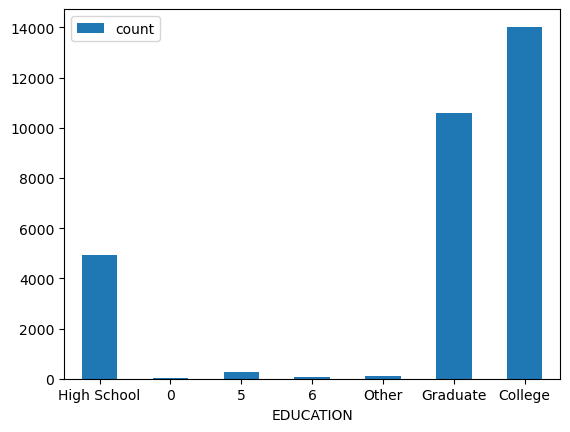

In [14]:
# Create bar plot of EDUCATION
# First, aggregate data
education_cats = spark_df.groupBy('EDUCATION').count()
education_cats.show()
# Then plot data
education_cats.toPandas().plot(x="EDUCATION", y="count", kind="bar", rot=0);

+--------+-----+
|MARRIAGE|count|
+--------+-----+
|       0|   54|
|   Other|  323|
| Married|13658|
|  Single|15964|
+--------+-----+



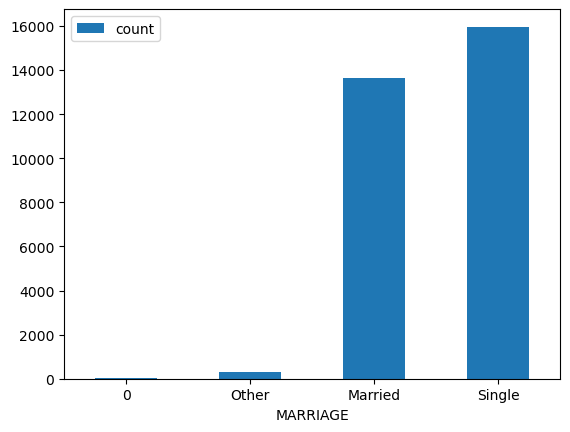

In [19]:
# Create bar plot of EDUCATION
# First, aggregate data
marriage_cats = spark_df.groupBy('MARRIAGE').count()
marriage_cats.show()
# Then plot data
marriage_cats.toPandas().plot(x="MARRIAGE", y="count", kind="bar", rot=0);

### 2. Binning

It looks like there are barely any records in the 0, 5, and 6 categories. Let's bin (combine) those with the current Other records into a single catch-all Other category for both EDUCATION and MARRIAGE.

The approach we'll use is similar to the CASE WHEN technique in SQL. If this were a SQL query, it would look something like this:

In [25]:
# SELECT CASE
#        WHEN EDUCATION = '0' THEN 'Other'
#        WHEN EDUCATION = '5' THEN 'Other'
#        WHEN EDUCATION = '6' THEN 'Other'
#        ELSE EDUCATION
#        END AS EDUCATION
#   FROM credit_card_default; 

In [29]:
spark_df.createOrReplaceTempView("credit_card_default")

In [41]:
# Write your SQL query
sql_query = """
    SELECT DISTINCT CASE
       WHEN EDUCATION = '0' THEN 'Other'
       WHEN EDUCATION = '5' THEN 'Other'
       WHEN EDUCATION = '6' THEN 'Other'
       ELSE EDUCATION
       END AS EDUCATION
  FROM credit_card_default; 
"""

# Execute the SQL query and get the result as a DataFrame
result_df = spark.sql(sql_query)

# Show the result
result_df.collect()
result_df.show(5)


+-----------+
|  EDUCATION|
+-----------+
|High School|
|      Other|
|   Graduate|
|    College|
+-----------+



With Spark SQL DataFrames, this is achieved using .withColumn() in conjunction with .when() and .otherwise().

In [39]:
from pyspark.sql import functions as F
# Bin EDUCATION categories
df_education_binned = spark_df.withColumn('EDUCATION',
                                          F.when(spark_df['EDUCATION'] == '0', 'Other')\
                                          .when(spark_df['EDUCATION'] == '5', 'Other')\
                                          .when(spark_df['EDUCATION'] == '6', 'Other')\
                                          .otherwise(spark_df['EDUCATION'])
                                         )
# Bin MARRIAGE categories
df_all_binned = df_education_binned.withColumn('MARRIAGE',
                                               F.when(df_education_binned['MARRIAGE'] == '0', 'Other')\
                                               .otherwise(df_education_binned['MARRIAGE'])
                                              )

# Select and show all distinct categories for EDUCATION and MARRIGE again
df_all_binned.select('EDUCATION').distinct().show()
df_all_binned.select('MARRIAGE').distinct().show()

+-----------+
|  EDUCATION|
+-----------+
|High School|
|      Other|
|   Graduate|
|    College|
+-----------+

+--------+
|MARRIAGE|
+--------+
|   Other|
| Married|
|  Single|
+--------+



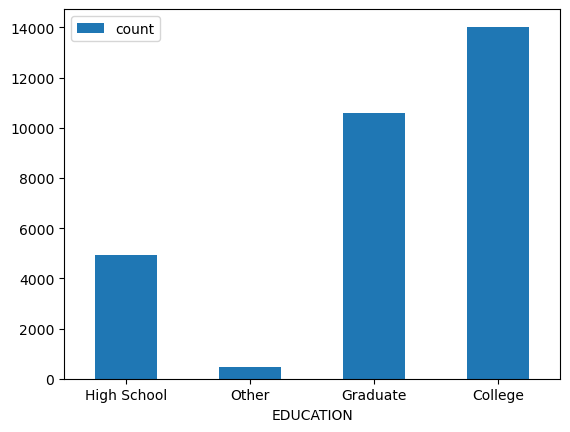

In [42]:
# Plot EDUCATION
df_all_binned.groupBy('EDUCATION')\
             .count()\
             .toPandas()\
             .plot(x="EDUCATION", y="count", kind="bar", rot=0);

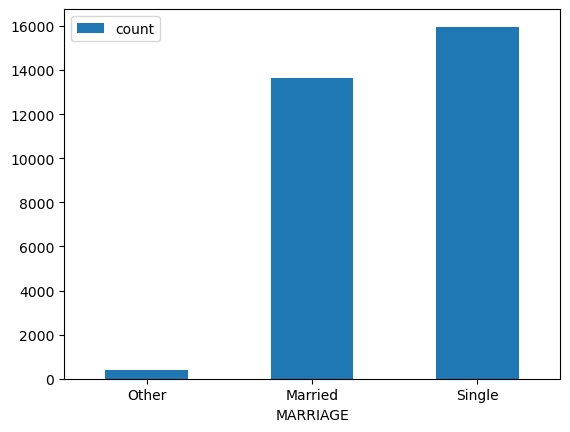

In [44]:
# Plot MARRIAGE
df_all_binned.groupBy('MARRIAGE')\
             .count()\
             .toPandas()\
             .plot(x="MARRIAGE", y="count", kind='bar', rot=0);

### 3. Class Balance Exploration

The overall distribution of class balance of the default column (the target for our upcoming machine learning process)

+-------+-----+
|default|count|
+-------+-----+
|      0|23364|
|      1| 6635|
+-------+-----+



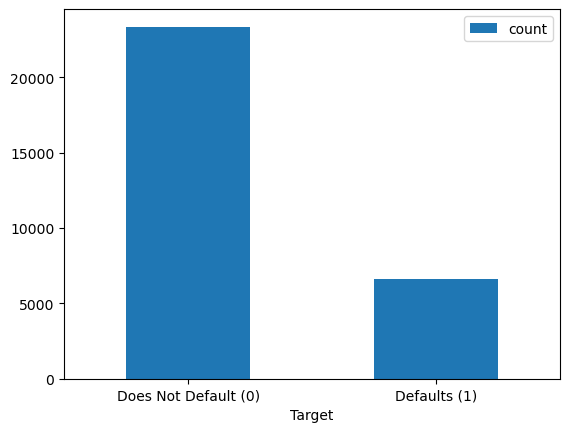

In [46]:
import matplotlib.pyplot as plt

# Group and aggregate target data
target_cats = df_all_binned.groupBy('default').count().orderBy('default')
target_cats.show()

# Plot target data
fig, ax = plt.subplots()
target_cats.toPandas().plot(x='default', y='count', kind='bar', ax=ax, rot=0)
ax.set_xlabel("Target")
ax.set_xticklabels(['Does Not Default (0)','Defaults (1)']);

Looks like we have a fairly imbalanced dataset.

Let's also visualize the difference in default rate between males and females in this dataset. Group by both default and SEX and visualize the comparison.

In [47]:
# Group and aggregate target and sex data
target_by_sex = df_all_binned.groupBy(['default', 'SEX']).count().orderBy(['default', 'SEX'])
target_by_sex.show()

+-------+------+-----+
|default|   SEX|count|
+-------+------+-----+
|      0|Female|14349|
|      0|  Male| 9015|
|      1|Female| 3762|
|      1|  Male| 2873|
+-------+------+-----+



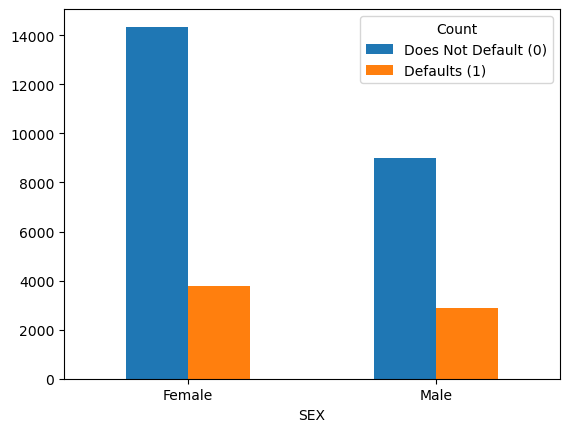

In [48]:
# Plot target and sex data
fig, ax = plt.subplots()

target_by_sex.toPandas().pivot(index='SEX', columns='default')\
               .plot(kind='bar', ax=ax, rot=0)

ax.legend(title="Count", labels=['Does Not Default (0)','Defaults (1)']);

It looks like males have an ever so slightly higher default rate than females, and also represent a smaller proportion of the dataset.

### PySpark Machine Learning Model Pipeline

Fit the data to the PySpark machine learning model pipeline. There will be:

3 StringIndexers
- One for each categorical feature

A OneHotEncoder
- To encode the newly indexed strings into categorical variables

A VectorAssembler
- To combine all features into one SparseVector

All of these initialized estimators should be stored in a list called stages.

A label indexer that maps a string column of labels to an ML column of label indices. If the input column is numeric, we cast it to string and index the string values. The indices are in [0, numLabels). 

**By default, this is ordered by label frequencies so the most frequent label gets index 0. The ordering behavior is controlled by setting stringOrderType. Its default value is ‘frequencyDesc’.**

In [49]:
# Import the necessary classes
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

# Create the string indexers and determine the names of the numeric
# and indexed columns
# (You could write this out for all 3 but we'll use a loop approach)
indexers = []
indexed_features = []
numeric_features = []

for column, data_type in df_all_binned.dtypes:
    if data_type == 'string':
        # Create StringIndexers for columns containing strings
        si = StringIndexer(inputCol=column, outputCol=column+'_num', handleInvalid='keep')
        indexers.append(si)
        # Save the name of the output column to sent to the OHE
        indexed_features.append(si.getOutputCol())
    elif column != "ID" and column != "default":
        # Unless it's ID (an identifier rather than a genuine feature),
        # append to list of numeric features if the dtype isn't string
        numeric_features.append(column)

print("Indexed string features:", indexed_features, "\n")
print("Numeric features:", numeric_features, "\n")

# Create a OneHotEncoder to encode the indexed string features
ohe = OneHotEncoder(
    inputCols=indexed_features,
    outputCols=[col + '_ohe' for col in indexed_features],
    dropLast=True
)

# Determine the names of the final list of features going into the model
features = numeric_features + ohe.getOutputCols()
print("Final features:", features, "\n")

# Create a VectorAssembler to combine all features
va = VectorAssembler(inputCols=features , outputCol='features')

# Assemble a list of stages that includes all indexers, the one-hot
# encoder, and the vector assembler
stages = indexers + [ohe, va]
print("Stages:", stages)

Indexed string features: ['SEX_num', 'EDUCATION_num', 'MARRIAGE_num'] 

Numeric features: ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'] 

Final features: ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_num_ohe', 'EDUCATION_num_ohe', 'MARRIAGE_num_ohe'] 

Stages: [StringIndexer_bf5d5cc61678, StringIndexer_2dd8d2d21f32, StringIndexer_f1b7e70ce006, OneHotEncoder_8a6ff0ccb66f, VectorAssembler_9dcdd613bb80]
